# Laboratorio 2 - Simulación
## Integrantes:
### Jose David Barona Hernandez
### Jennyfer Belalcazar Manrique
### Diego Ledesma

In [1]:
#Datos globales
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt, ceil
from scipy.stats import chi2_contingency 
import random
import math

#Funcion global para normalizar
def normalize(lis,m):
 lis2 =[]
 for i in range(len(lis)):
  lis2.append(round(lis[i]/ m, 2))
 return lis2

 #Normalizar para usar poker
def normalize2(lis,m):
 lis2 =[]
 for i in range(len(lis)):
  lis2.append(round(lis[i]/ m, 3))
 return lis2

#Lista de datos para probar la funciones del punto 2, se espera que pase la prueba
N = 1000
data = np.random.uniform(0,1,N)




# 1. Implementar los algoritmos de generación de secuencias pseudoaletorias (Von Neuman, congruencia lineal y fibonacci), ejecutarlos y obtener sus salidas en alguna(s) variable(s). Generar secuencias de 1000 datos.

# Von neuman

In [2]:
#Funcion que recibe un numero de tipo int
def vonNeuman(n):
    dig_count = 4
    sqr = n**2
    val = sqr // (10**(dig_count / 2)) 
    val = int(val % (10**dig_count) ) 
    return val

#Funcion que recibe un numero de tipo int y el tamaño de la lista a generar
def vonNeumanList(n, length):
    lis = []
    a = n
    for _ in range(length):
        lis.append(a)
        a = vonNeuman(a)
    return lis

n = 3168 #Numero inicial
length = 1000 #Tamaño del array

#Lista sin normalizar 
lis = vonNeumanList(n, length)
print(lis)
m=max(lis)

#Lista normalizada
lis2 = normalize(lis,m)
print(lis2)

[3168, 362, 1310, 7161, 2799, 8344, 6223, 7257, 6640, 896, 8028, 4487, 1331, 7715, 5212, 1649, 7192, 7248, 5335, 4622, 3628, 1623, 6341, 2082, 3347, 2024, 965, 9312, 7133, 8796, 3696, 6604, 6128, 5523, 5035, 3512, 3341, 1622, 6308, 7908, 5364, 7724, 6601, 5732, 8558, 2393, 7264, 7656, 6143, 7364, 2284, 2166, 6915, 8172, 7815, 742, 5505, 3050, 3025, 1506, 2680, 1824, 3269, 6863, 1007, 140, 196, 384, 1474, 1726, 9790, 8441, 2504, 2700, 2900, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100

# Congruencia lineal

In [27]:
#Funcionq ue recibe semilla int, a int, c int, m int
def congruencia(rand, a, c, m):
    rand = (a*rand + c) % (m)  
    return rand

def congruenciaList(n, length, a , c, m):
    lis = []
    for _ in range(length):
        lis.append(n)
        n = congruencia(n, a, c, m)
    return lis

n = 999 #Semilla
length = 2000 #Tamaño del array
a = 16645 
c = 13647 
m = 317 

#Lista sin normalizar 
lis = congruenciaList(n, length, a, c, m)
print(lis)

#Lista sin normalizar 
lis2 = normalize(lis,m)
print(lis2)

[999, 136, 39, 272, 62, 171, 285, 253, 173, 290, 107, 125, 170, 124, 9, 197, 33, 257, 183, 315, 11, 202, 204, 209, 63, 15, 212, 229, 113, 140, 49, 297, 283, 248, 2, 21, 227, 108, 286, 97, 100, 266, 47, 292, 112, 296, 122, 4, 26, 81, 60, 166, 114, 301, 293, 273, 223, 98, 261, 193, 23, 232, 279, 238, 294, 117, 150, 74, 201, 43, 282, 87, 75, 45, 287, 258, 27, 242, 304, 142, 54, 151, 235, 128, 19, 222, 254, 17, 217, 83, 65, 20, 66, 181, 310, 157, 250, 7, 192, 179, 305, 303, 298, 127, 175, 295, 278, 77, 50, 141, 210, 224, 259, 188, 169, 280, 82, 221, 93, 90, 241, 143, 215, 78, 211, 68, 186, 164, 109, 130, 24, 76, 206, 214, 234, 284, 92, 246, 314, 167, 275, 228, 269, 213, 73, 40, 116, 306, 147, 225, 103, 115, 145, 220, 249, 163, 265, 203, 48, 136, 39, 272, 62, 171, 285, 253, 173, 290, 107, 125, 170, 124, 9, 197, 33, 257, 183, 315, 11, 202, 204, 209, 63, 15, 212, 229, 113, 140, 49, 297, 283, 248, 2, 21, 227, 108, 286, 97, 100, 266, 47, 292, 112, 296, 122, 4, 26, 81, 60, 166, 114, 301, 293, 27

In [34]:
a = 139
c = 17
m = 271
x0 = 9
length = 100
list8E1 = np.array(congruenciaList(n, length, a , c, m))
normalized8E1 = np.array(normalize(list8E1,m)) #np.max(list8E1)))
print(normalized8E1)

[3.69 0.46 0.69 0.98 0.99 0.01 0.6  0.67 0.9  0.21 0.81 0.9  0.73 0.11
 0.94 0.34 0.76 0.24 0.89 0.68 0.93 0.8  0.88 0.14 0.04 0.7  0.03 0.17
 0.14 0.07 0.3  0.1  0.4  0.46 0.66 0.39 0.92 0.78 0.29 0.07 0.81 0.39
 0.43 0.07 0.32 0.69 0.46 0.69 0.98 0.99 0.01 0.6  0.67 0.9  0.21 0.81
 0.9  0.73 0.11 0.94 0.34 0.76 0.24 0.89 0.68 0.93 0.8  0.88 0.14 0.04
 0.7  0.03 0.17 0.14 0.07 0.3  0.1  0.4  0.46 0.66 0.39 0.92 0.78 0.29
 0.07 0.81 0.39 0.43 0.07 0.32 0.69 0.46 0.69 0.98 0.99 0.01 0.6  0.67
 0.9  0.21]


# fibonacci

In [4]:
def fibonacciNumbers(length):
  a = 0
  b = 1
  lst = np.array([a, b])
  for i in range (length - 2):
    n = a + b
    lst = np.append(lst, int(n))
    a = b
    b = n
  return lst


def fibonacciElem(index):
  if (index == 0):
    return 0
  elif (index == 1):
    return 1
  else:
    a = 0
    b = 1
    for i in range (index - 1):
      n = a + b
      a = b
      b = n
    return int(n)


#Suma
def additiveLFG(j, k, m, length):
  n = k
  lst = np.array([], dtype = np.int64)

  #Al inicio el arreglo no es lo suficientemente largo
  #para tomar los valores anteriores y se toman los valores de la serie 
  #de fibonacci.
  while ((len(lst) < k) and (len(lst) < length) ):
    lst = np.append(lst, int( fibonacciElem(n - j) + fibonacciElem(n - k) ) % m )
    n += 1
  if (len(lst) == length):
    print("prem")
    return lst
  else:

    #Cuando ya es suficientemente largo el arreglo los valores siguientes 
    #se calculan usando sus propios elementos.
    while( len(lst) < length ):
      lst = np.append(lst, int( lst[len(lst) - j] + lst[len(lst) - k] ) % m )
      n += 1
    return lst



#Multiplicacion
def multiplicativeLFG(j, k, m, c, length):
  n = k
  lst = np.array([], dtype = np.int64)

  #Al inicio el arreglo no es lo suficientemente largo
  #para tomar los valores anteriores y se toman los valores de la serie 
  #de fibonacci.
  while ((len(lst) < k) and (len(lst) < length) ):
    lst = np.append(lst, int( fibonacciElem(n - j) * fibonacciElem(n - k) + c ) % m )
    n += 1
  if (len(lst) == length):
    print("prem")
    return lst
  else:

    #Cuando ya es suficientemente largo el arreglo los valores siguientes 
    #se calculan usando sus propios elementos.
    while( len(lst) < length ):
      lst = np.append(lst, int( lst[len(lst) - j] * lst[len(lst) - k] + c ) % m )
      n += 1
    return lst

m = 59 # 59 es un número primo
j = 17
k = 41
length = 1000
#El parámetro c es el valor de la constante aditiva, 
#la cual impide que la secuencia converja a 0 sin poder salir
#de ese valor.
c = 2

lisMulti = multiplicativeLFG(j, k, m, c, length)
lisMultiNormalizada = np.array(normalize(lisMulti,m))  #normalización
print(lisMulti)
print(lisMultiNormalizada)

lisSum = additiveLFG(j, k, m, length)
lisSumNormalizada = np.array(normalize(lisSum,m))  #normalización
print(lisSum)
print(lisSumNormalizada)




[ 2 38 32 16 54 45  1 34 21 46 37 23 11 27 49 19 46 18 46 19 49 27 11 23
 37 46 21 34  1 45 54 16 32 38  2 44 50  5  3 21 39 17 39 25 15 56 21 56
 15 25 39 17 11 21 19 31 47 26 13 26  5 29 39 56 51 26 31 54 49 13  3 25
 26 31 46 28 25 16 29  1 57 44 31 31 54 29 22  6 45 38 10 26  6 41 43 22
 33 26 25 51 41 36 17 34 43 55 46 17 49  1  4 13 21 34 41 31 14 24 47 23
 36 34  3 12 57 52 31 31 21  3 55 58 41 27 42 17 36 10  1 18 24 38 45 57
 53 20 49 54 44  5 29 52 46 50 47 43 29 43 29 52 15 22 33 31  1 32 26 16
 21 24 34 50 18 11 42 40  1 11 45 35 29 26 38 51 29 53 10 16 47 27 57 40
 17 48 21 52 32 17 58 42 58 24 47 37 26 49 40  9 52  5 33  8  6 47 12 19
 30  1 30 52 58 48 37 47 48 35 31 37 12 48 32 37 54 40 50 42 51 29 51 24
 29 13 16 43 14 19 53 43 40 37 25  0 43 13  8 24 45 46 15 10 55 47 29 16
 17 34 58 10  2 46 36 22  5 13 13 44  9 34  8  6 32 23 31 45 19 30 50 22
  4 25 11 32  2 35 31  7 28 26 57 54 39 44 55 36  0 11 26 50 27  6 19 56
 38 24 45 35 18 58 23 29 41  2 19 41 10 43  5  8 54

# 2. Implementar los algoritmos de pruebas de uniformidad ( Kolmogorov-Smirnov, χ2), y de independencia (corridas, series y poker).

# Kolmogorov-Smirnov

In [5]:
# n := Cantidad de números aleatorios
# c := Cantidad de intervalos

n =  1000
c = ceil(sqrt(n))
gl = n  # Grados de libertad


def uniformePEA(n):
    lis = []
    c = ceil(sqrt(n))
    lis.append(1/c)
    for i in range(c - 1):
        lis.append( round(lis[len(lis) - 1] + (1/c), 2) )
    return lis

In [6]:
lsU_PEA = uniformePEA(100)
print(lsU_PEA)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [7]:
# Calcula el DMcalc del test de Kolmogorov-Smirnov
def dmCalc_kolmogorov_Smirnov(n, lisFO):
    c = len(lisFO)
    gl = n  # Grados de libertad

    lisPEA = uniformePEA(n)

    lisFOA = [ lisFO[0] ]
    for i in range(1, c):
        lisFOA.append( lisFOA[i - 1] + lisFO[i] )
    
    lisPOA = list ( map ( lambda x: x / n , lisFOA ))

    v1 = lisPEA[0]
    v2 = lisPOA[0]
    d = abs( lisPEA[0] - lisPOA[0] )
    for i in range(1, c):
        if ( abs( lisPEA[i] - lisPOA[i] ) > d ):
            d = round( abs( lisPEA[i] - lisPOA[i] ), 2)
    return d

In [8]:
foEj = [11, 6, 16, 9, 7, 11, 10, 9, 15, 6]  # Frecuencias Observadas de ejemplo visto en clase
dmCalc_kolmogorov_Smirnov(100, foEj)  # Arroja el mismo valor para DMcalc obtenido en el ejemplo visto en clase

0.04

In [9]:
# Genera un arreglo con observaciones para intervalos de diez enteros 
# en base a un arreglo de frecuencias observadas arrayFO
def crearObservacioens(arrayFO):
    ejObs = []
    for i in range (len(arrayFO)):
        for j in range(arrayFO[i]):
            ejObs.append((10 * i) + random.randint(0,9))
    return ejObs

In [10]:
ejObs = crearObservacioens(foEj)
len(ejObs)

100

In [11]:
# for a 0.01, 0.05 or 0.10 significance level
def critValKolmogorov(n, significanceLevel):
    if (significanceLevel == 0.01):
        if (n > 20):
            return 1.63 / sqrt(n)

        elif (n == 5):
            return 0.669
        elif (n == 8):
            return 0.543
        elif (n == 10):
            return 0.490
        elif (n == 12):
            return 0.450
        elif (n == 15):
            return 0.404
        elif (n == 20):
            return 0.356
    elif (significanceLevel == 0.05):
        if (n > 20):
            return 1.36 / sqrt(n)

        elif (n == 5):
            return 0.565
        elif (n == 8):
            return 0.457
        elif (n == 10):
            return 0.410
        elif (n == 12):
            return 0.375
        elif (n == 15):
            return 0.338
        elif (n == 20):
            return 0.294
    elif (significanceLevel == 0.10):
        if (n > 20):
            return 1.22 / sqrt(n)

        elif (n == 5):
            return 0.510
        elif (n == 8):
            return 0.411
        elif (n == 10):
            return 0.368
        elif (n == 12):
            return 0.338
        elif (n == 15):
            return 0.304
        elif (n == 20):
            return 0.264


In [12]:
def classifyKS(data, maxVal):
    n = len(data)
    c = ceil(sqrt(n))
    freqList = np.zeros(c, dtype = int)
    for i in range(n):
        for j in range (1, c):
            interv = c - 1
            if (data[i] < (j *(maxVal / c)) ):
                freqList[j] += 1
                break
    return freqList

In [13]:
# Funciona para los valores de n: {5, 8, 10, 12, 15, 20}, para n > 20 
# y para una significancia de 0.01, 0.05 o 0.10 
def kolmogorovTest(data, maxVal, significanceLevel):
    n = len(data)
    lisFo = classifyKS(data, maxVal)
    dmCalc = dmCalc_kolmogorov_Smirnov(n, lisFo)
    critVal = critValKolmogorov(n, significanceLevel)
    if (dmCalc > critVal):
        #print("Se rechaza la hipotesis nula")
        return False
    else:
        #print("No se rechaza la hipotesis nula")
        return True

kolmogorovTest(data, max(data), 0.05) #Se prueba la funcion con una secuencia uniforme generada por la libreria numpy, dando como resultado que si pasa la prueba

True

# χ2

In [14]:
#Funcion que recibe un array de datos y un nivel de confianza ej: 0.05
def chi2(data,nivelConfianza):
  n= len(data)
  c = round(sqrt(n),0)
  gradosLibertad = int(c)-1
  valorChi = stats.chi2.ppf(1-nivelConfianza, gradosLibertad)
  miValorChi = hallarChiData(data)
  #Verifico que el valor que halle de chi sea menor que el esperado
  if(miValorChi <= valorChi):
    return True
  else:
    return False

#Cuento cuantos datos hay en un determinado intervalo
def contar(data,init,final):
    n=0
    for i in range(len(data)):
      if(data[i]>=init and data[i]<final):
        n +=1
    return n

#Se crean los intervalos y se van sumando los resultados para hallar mi valor de chi
def hallarChiData(data):
  n=len(data) #Tamaño array
  c = round(sqrt(n),0) #Numero de clases
  gradosLibertad = int(c)-1
  FE = n/c #Frecuencia esperada
  normalizaArray = normalize(data,max(data)) #Normalizo los datos
  tamañoIntervalo = 1/c #Es 1/c debido a que se normalizaron
  sum =0
  inicioIntervalo=0
  finIntervalo = tamañoIntervalo
  for i in range(int(c)):
    
    #FO es contar la cantidad de veces que sale un num de data en un intervalo
    FO = contar(normalizaArray,inicioIntervalo,finIntervalo )
    if(finIntervalo==1):
      FO +=1
    sum += pow(FE-FO,2)/FE #Sumatoria para hallar chi
    """
    Prints de apoyo para ver los intervalos generados
    print('inicio')
    print(inicioIntervalo)
    print('fin')
    print(finIntervalo)
    print('FO')
    print(FO)
    print('-----------')"""
    inicioIntervalo += tamañoIntervalo
    finIntervalo +=  tamañoIntervalo
  #Retorna mi valor de chi
  return sum


print(chi2(data,0.05)) #Se prueba la funcion con una secuencia uniforme generada por la libreria numpy, dando como resultado que si pasa la prueba



False


# Corridas

In [15]:


def corrida(data,numConfianza):
  data = normalize(data,max(data)) #Normalizo los datos
  contCrecimientoData = contarCrecimiento(data)[0] #Cuento cuantas subidas habia (crecimiento)
  contDrecrecimientoData = (len(data)- contarCrecimiento(data)[0])-1 #Cuento cuantas bajadas habia (decrecimiento)
  contCorridas = contarCrecimiento(data)[1] #Cuanto el numero de corridas

  u = media(contCrecimientoData,contDrecrecimientoData) #media
  vari = varianza(contCrecimientoData,contDrecrecimientoData) #varianza

  nivelCon = nivelConfianza(numConfianza)

  #Creacion de intervalo de confianza
  limiteInferiorIntervalo = ((nivelCon*-1)*vari)+u
  limiteeSuperiorIntervalo = (nivelCon*vari)+u

  #Si mi numero de corridas esta dentro de intervalo de confianza para la prueba de lo contrario no
  if(contCorridas>=limiteInferiorIntervalo and contCorridas<= limiteeSuperiorIntervalo):
    return True #pasa la prueba
  else:
    return False

#Halla media
def media(n1,n2):
  u = ((2*n1*n2)/(n1+n2))+1
  return u

#Hallar varianza
def varianza(n1,n2):
  varianza = sqrt(((2*n1*n2)*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2+1)))
  return varianza

#Funcion para contar crecimiento y el numero de corridas
def contarCrecimiento(data):
  acumC =0
  numCorridas =0
  datos =[]
  for i in range(len(data)-1):
    if(data[i+1]>data[i]):
      acumC += 1
    else:
      numCorridas +=1 
  datos.append(acumC)
  datos.append(numCorridas)
  return datos

#Tabla para niveles de confianza
def nivelConfianza(num):
  if(num==0.05):
    return 1.96
  elif(num==0.06):
    return 1.88
  elif(num==0.07):
    return 1.81
  elif(num==0.08):
    return 1.75
  elif(num==0.09):
    return 1.69
  elif(num==0.1):
    return 1.65
  elif(num==0.2):
    return 1.28
  elif(0.3773):
    return 1
  elif(num==0.5):
    return 0.6745
  else:
    return "error"

corrida(data,0.05) #Se prueba la funcion con una secuencia uniforme generada por la libreria numpy, dando como resultado que si pasa la prueba

True

# series

In [16]:
# Asumiendo que num pertenece al rango [0,1], y que dicho rango
# está dividido en L intervalos, devuelve el número de intervalo
# siendo el intervalo [0,0.1) el intervalo 0, para L = 10.
def getInterval(num, L):
    interStarts = [round(i*(1/L), 4) for i in range(L)]
    #print(interStarts)

    interval = L - 1
    for i in range(len(interStarts) - 1):
        if (num < interStarts[i + 1]):
            interval = i
            break
    return interval

In [17]:
getInterval(0.18, 20)

3

In [18]:
# Retorna True si los datos
# pasan la prueba de series, False en caso contrario.

# Se asume que len(datos) es múltiplo de k.

def testSeries(datos, maxVal, k, conf):
    datos = normalize(datos, maxVal)
    n = len(datos)
    g = int(n / k)       # Cantidad de grupos (tuplas)
    c = ceil(sqrt(g))   # Cantidad de clases
    intervs = ceil( pow( g, 1/(2*k) ) )  # Cantidad de intervalos para cada dimensión
    #print("intervs", intervs)
    #Frecuencias observadas
    frecObs = np.zeros((intervs ** (k - 1),intervs), dtype=int)   
    #print("frecObs", frecObs) 
    # for dim in range (k):
    #     for i in range(n):
    #         frecObs[datos[i][dim]][datos[i][dim + 1]] += 1

    for i in range (g):
        #col = getInterval(datos[i * k + (k - 1)], intervs)
        col = getInterval(datos[i * k + (k - 1)], intervs)
        row = 0
        for dim in range (k - 1):
            #print("row", row)
            row += getInterval(datos[i * k + dim], intervs) + (intervs ** ((k - 1) - dim - 1 )) - 1 #(intervs ** (dim))
        #print("row, col",row, col)
        frecObs[row][col] += 1
    #print(frecObs)

    #Prueba de Chi cuadrado

    # Se calcula la frecuencia esperada por clase
    fe = g / c

    finalMatrix = np.zeros((intervs ** (k - 1),intervs), dtype=float)
    for i in range (intervs ** (k - 1)):
        for j in range (intervs):
            finalMatrix[i][j] = ((fe - frecObs[i][j]) ** 2) / fe

    # Valor calculado para la prueba de Chi cuadrado
    calculated = np.sum(finalMatrix)

    # grados de libertad
    freedomD = c - 1

    # Valor crítico
    criticVal = stats.chi2.ppf(1-conf, freedomD)

    #print("Valor calculado: ", calculated)
    #print("Valor crítico: ", criticVal)
    return calculated <= criticVal

print(testSeries(data,max(data),2,0.05)) #Se prueba la funcion con una secuencia uniforme generada por la libreria numpy, dando como resultado que si pasa la prueba

True


# poker 

In [19]:
#Funcion que recibe los array de datos y un nivel de confianza
def poker(data,nivelConfianza):
  n = len(data)
  data = normalize2(data,max(data)) #Normalizo los datos de forma que me genere tres deciamales 
  sacarParteDecimal = decimal(data) #Saco la parte deciamles de los numeros normalizados

  contarArr = contarPoker(sacarParteDecimal) #Funcion para contar dos y tres decimales iguales

  dosIgules = contarArr[0] #Contar cuantos tienen dos decimales iguales
  tresIguales = contarArr[1] #Contar cuantos tienen tres decimales iguales
  distintos = len(data)-(dosIgules+tresIguales) #Contar cuantos tienen los tres deciamles diferentes
  
  #Hallo mi valor chi, en este casi son tres valores
  miValorChi = (((0.01*len(data)-tresIguales)**2)/(0.01*len(data)*len(data))) + (((0.24*len(data)-dosIgules)**2)/(0.24*len(data)*len(data))) + (((0.72*len(data)-distintos)**2)/(0.72*len(data)*len(data))) 
  valorChi = stats.chi2.ppf(1-nivelConfianza, 2)

  if(miValorChi <= valorChi):
    return True
  else:
    return False

#Sacar parte decimal de los datos y volverlo un entero
def decimal(data):
  arr = []
  for i in range(len(data)):
    parte_decimal, parte_entera = math.modf(data[i])
    arr.append(int(parte_decimal*10))
  return arr

#Funcion para contar dos y tres decimales iguales (Se hace mediante operaciones matematicas)
def contarPoker(data):
  tresIguales= 0
  dosIguales = 0
  arr = []
  for i in range(len(data)):
    if(data[i]>0 and data[i]<=10):
      dosIguales +=1
    elif(data[i]==0):
      tresIguales +=1
    elif(data[i]>10 and data[i]<=99): #si 11 22
      if(math.trunc(data[i]/10)==((data[i]/10)-math.trunc(data[i]/10)*10)):
        dosIguales +=1
    else:
      if(math.trunc(data[i]/100)==math.trunc(((data[i]/100)-math.trunc(data[i]/100))*10)==math.trunc(((((data[i]/100)-math.trunc(data[i]/100))*10)-math.trunc(((data[i]/100)-math.trunc(data[i]/100))*10))*10)):
        tresIguales +=1
      elif(math.trunc(data[i]/100) == math.trunc(((((data[i]/100)-math.trunc(data[i]/100))*10)-math.trunc(((data[i]/100)-math.trunc(data[i]/100))*10))*10) or
           math.trunc(data[i]/100) == math.trunc(((data[i]/100)-math.trunc(data[i]/100))*10) or
           math.trunc(((data[i]/100)-math.trunc(data[i]/100))*10)==math.trunc(((((data[i]/100)-math.trunc(data[i]/100))*10)-math.trunc(((data[i]/100)-math.trunc(data[i]/100))*10))*10)):
        dosIguales +=1
  
  arr.append(dosIguales)
  arr.append(tresIguales)
  return arr

poker(data,0.05) #Se prueba la funcion con una secuencia uniforme generada por la libreria numpy, dando como resultado que si pasa la prueba


True

# 3. Usar las secuencias generadas en el primer punto para verificar su si pasan las pruebas del punto 2. (Usar como nivel de confianza por defecto 0.05).

In [20]:
length = 1000
m = 2**34 

#Congruencia
n = 100
a = 200
c = 1283 

#Von Neuman
nVonNeuman = 3168 

#Fibu
j = 17
k = 41
c = 2

#Funciones generadas en el punto 1
pruebaVonNeuman =  vonNeumanList(nVonNeuman, length)
pruebaCongruencia = congruenciaList(n, length, a, c, m)
pruebaFibunacciSuma = additiveLFG(j, k, m, length)
pruebaFibunacciMulti = multiplicativeLFG(j, k, m, c, length)

#Funciones generadas en el punto 2
print('----------------------------Prueba a Von Neuman----------------------')  #True paso la prueba, False sino
print('serie generada:')
print(pruebaVonNeuman) #Lista de 1000 datos generados por Von Neuman
print("-----Kolmogorov--------")
print(kolmogorovTest(pruebaVonNeuman, max(pruebaVonNeuman), 0.05)) #datos, num maximo, nivel de confianza 
print("-----Chi 2-------------")
print(chi2(pruebaVonNeuman,0.05)) #datos y nivel de confianza
print("-----Corrida-----------")
print(corrida(pruebaVonNeuman,0.05)) #datos y nivel de confianza
print("-----Serie-------------")
print(testSeries(pruebaVonNeuman, max(pruebaVonNeuman), 2, 0.05)) #datos, num maximo de los datos, pares y confianza
print("-----Poker-------------")
print(poker(pruebaVonNeuman,0.05))#datos y nivel de confianza

print('----------------------------Prueba a Congruencia----------------------') #True paso la prueba, False sino
print('serie generada:')
print(pruebaCongruencia) #Lista de 1000 datos generados por congruencia
print("-----Kolmogorov--------")
print(kolmogorovTest(pruebaCongruencia, max(pruebaCongruencia), 0.05)) #datos, num maximo, nivel de confianza 
print("-----Chi 2-------------") 
print(chi2(pruebaCongruencia,0.05)) #datos y nivel de confianza
print("-----Corrida-----------")
print(corrida(pruebaCongruencia,0.05)) #datos y nivel de confianza
print("-----Serie-------------")
print(testSeries(pruebaCongruencia, max(pruebaCongruencia), 2, 0.05)) #datos, num maximo de los datos, pares y confianza
print("-----Poker-------------")
print(poker(pruebaCongruencia,0.05))#datos y nivel de confianza

print('----------------------------Fibunacci suma----------------------') #True paso la prueba, False sino
print('serie generada:')
print(normalize(pruebaFibunacciSuma,m)) #Para una mejor visualizacion de los datos 100 datos se normalizo
print("-----Kolmogorov--------")
print(kolmogorovTest(pruebaFibunacciSuma, max(pruebaFibunacciSuma), 0.05)) #datos, num maximo, nivel de confianza 
print("-----Chi 2-------------") 
print(chi2(pruebaFibunacciSuma,0.05)) #datos y nivel de confianza
print("-----Corrida-----------") 
print(corrida(pruebaFibunacciSuma,0.05)) #datos y nivel de confianza
print("-----Serie-------------")
print(testSeries(pruebaFibunacciSuma, max(pruebaFibunacciSuma), 2, 0.05)) #datos, num maximo de los datos, pares y confianza
print("-----Poker-------------")
print(poker(pruebaFibunacciSuma,0.05))#datos y nivel de confianza

print('----------------------------Fibunacci multiplicacion----------------------')  #True paso la prueba, False sino
print('serie generada:')
print(normalize(pruebaFibunacciMulti,m))#Para una mejor visualizacion de los datos 100 datos se normalizo
print("-----Kolmogorov--------")
print(kolmogorovTest(pruebaFibunacciMulti, m - 1, 0.05)) #datos, num maximo, nivel de confianza
print("-----Chi 2-------------") 
print(chi2(pruebaFibunacciMulti,0.05)) #datos y nivel de confianza
print("-----Corrida-----------") 
print(corrida(pruebaFibunacciMulti,0.05)) #datos y nivel de confianza
print("-----Serie-------------")
print(testSeries(pruebaFibunacciMulti, max(pruebaFibunacciMulti), 2, 0.05)) #datos, num maximo de los datos, pares y confianza
print("-----Poker-------------")
print(poker(pruebaFibunacciMulti,0.05))#datos y nivel de confianza

/tmp/ipykernel_8234/2056996843.py:72: RuntimeWarning: overflow encountered in long_scalars
  lst = np.append(lst, int( lst[len(lst) - j] * lst[len(lst) - k] + c ) % m )


----------------------------Prueba a Von Neuman----------------------
serie generada:
[3168, 362, 1310, 7161, 2799, 8344, 6223, 7257, 6640, 896, 8028, 4487, 1331, 7715, 5212, 1649, 7192, 7248, 5335, 4622, 3628, 1623, 6341, 2082, 3347, 2024, 965, 9312, 7133, 8796, 3696, 6604, 6128, 5523, 5035, 3512, 3341, 1622, 6308, 7908, 5364, 7724, 6601, 5732, 8558, 2393, 7264, 7656, 6143, 7364, 2284, 2166, 6915, 8172, 7815, 742, 5505, 3050, 3025, 1506, 2680, 1824, 3269, 6863, 1007, 140, 196, 384, 1474, 1726, 9790, 8441, 2504, 2700, 2900, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 61

# 4. Graficar las distribuciones de probabilidad de las frecuencias observadas, analizar los resultados obtenidos en las pruebas del punto 3 y escribir conclusiones.

----------------Von neuman------------------
Frequency of unique values of the said array:
[[ 140  196  362  384  742  896  965 1007 1310 1331 1474 1506 1622 1623
  1649 1726 1824 2024 2082 2100 2166 2284 2393 2504 2680 2700 2799 2900
  3025 3050 3168 3269 3341 3347 3512 3628 3696 4100 4487 4622 5035 5212
  5335 5364 5505 5523 5732 6100 6128 6143 6223 6308 6341 6601 6604 6640
  6863 6915 7133 7161 7192 7248 7257 7264 7364 7656 7715 7724 7815 7908
  8028 8100 8172 8344 8441 8558 8796 9312 9790]
 [   1    1    1    1    1    1    1    1    1    1    1    1    1    1
     1    1    1    1    1  231    1    1    1    1    1    1    1    1
     1    1    1    1    1    1    1    1    1  232    1    1    1    1
     1    1    1    1    1  231    1    1    1    1    1    1    1    1
     1    1    1    1    1    1    1    1    1    1    1    1    1    1
     1  231    1    1    1    1    1    1    1]]
Probabilidades:  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0

'\nConclusiones:\n*Se ejecuto varias veces el generador de numeros aleatorias y en varias ocaciones no paso la prueba de uniformidad, pero no se debe a que sea un mal generador\nsino que algunas veces tiene algunos picos lo cual hace que no pase la prueba\n*Paso las pruebas de independencia lo cual significa que no existian patrones dentro de los numeros\n*En general podemos decir que es un buen generador y facil de implementar, sin embargo puede demorar algo su ejecucion y la semilla en este caso debe ser un numero de 4 digitos\n\n'

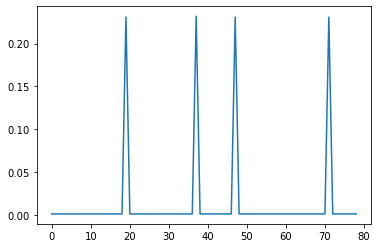

In [21]:
print("----------------Von neuman------------------")
listaVonNeuman = np.array( pruebaVonNeuman )

unique_elements_von, counts_elements_von = np.unique(listaVonNeuman, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements_von, counts_elements_von)))

## normalizado = unique_elements / m
probsVon = counts_elements_von / length;
print("Probabilidades: ", probsVon)

plt.plot(probsVon)

"""
Conclusiones:
*Se ejecuto varias veces el generador de numeros aleatorias y en varias ocaciones no paso la prueba de uniformidad, pero no se debe a que sea un mal generador
sino que algunas veces tiene algunos picos lo cual hace que no pase la prueba
*Paso las pruebas de independencia lo cual significa que no existian patrones dentro de los numeros
*En general podemos decir que es un buen generador y facil de implementar, sin embargo puede demorar algo su ejecucion y la semilla en este caso debe ser un numero de 4 digitos

"""

----------------Congruencia------------------
Frequency of unique values of the said array:
[[        100       20002     4000402   800080402  5397257746  8073674258
   9151086098  9419521554 11298569746 14299659794 16969268754 17007017490]
 [          1           1           1           1           1           1
          989           1           1           1           1           1]]
Probabilidades:  [0.001 0.001 0.001 0.001 0.001 0.001 0.989 0.001 0.001 0.001 0.001 0.001]


'\nConclusiones:\n*Se ejecuto varias veces el generador de numeros aleatorias y en varias ocaciones igual que el anterior no paso la prueba de uniformidad, esto se debe que casi siempre se poduce un pico en el algoritmo\n, este pico se puede deber a muchas cosas que explicare a continuaciones, en nuestra opinion este algoritmo tiene una desventaja y es que para generar los numeros depende de muchas entradas y al minimo\ncambio que se le haga a una puede generar una salida muy distinta, entonces es muy importante saber cuales seran las entradas y hay algunos consejos de como escogerlos, sin embargo puede que estas \nrecomendaciones no siempre nos sirvan.\n*En el caso de las pruebas de independencia la que casi siempre pasaba era la de poker, una de las posibles razones de que no pasara las otras es que siempre se hace modulo\na un mismo numero por lo que se pueden empezar a encontrar patrones\n*En general la congruencia puede ser un buen generador porque es rapido pasa algunas pruebas d

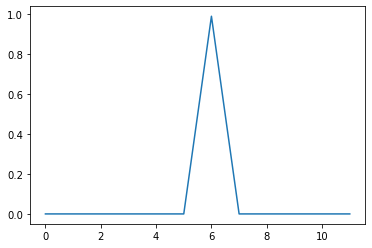

In [22]:
print("----------------Congruencia------------------")
listaCongruencia = np.array( pruebaCongruencia  )

unique_elements_con, counts_elements_con = np.unique(listaCongruencia, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements_con, counts_elements_con)))

## normalizado = unique_elements / m
probsCon = counts_elements_con / length;
print("Probabilidades: ", probsCon)

plt.plot(probsCon)

"""
Conclusiones:
*Se ejecuto varias veces el generador de numeros aleatorias y en varias ocaciones igual que el anterior no paso la prueba de uniformidad, esto se debe que casi siempre se poduce un pico en el algoritmo
, este pico se puede deber a muchas cosas que explicare a continuaciones, en nuestra opinion este algoritmo tiene una desventaja y es que para generar los numeros depende de muchas entradas y al minimo
cambio que se le haga a una puede generar una salida muy distinta, entonces es muy importante saber cuales seran las entradas y hay algunos consejos de como escogerlos, sin embargo puede que estas 
recomendaciones no siempre nos sirvan.
*En el caso de las pruebas de independencia la que casi siempre pasaba era la de poker, una de las posibles razones de que no pasara las otras es que siempre se hace modulo
a un mismo numero por lo que se pueden empezar a encontrar patrones
*En general la congruencia puede ser un buen generador porque es rapido pasa algunas pruebas de independencia y uniformanidad, sin embargo tiene la desventaja de que cualquier 
modificacion en uno de sus parametros puede afectar significativamente al resultado

"""

----------------Fibu suma------------------
Frequency of unique values of the said array:
[[      46368       75026      121394 ... 17111809166 17122630984
  17177297678]
 [          1           1           1 ...           1           1
            1]]
Probabilidades:  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001


'\nConclusiones:\n*En comparacion con los otros generadores este fue el mejor, lo podemos evidenciar en que pasa la mayoria de pruebas de uniformidad y diversidad, ademas lo podemos ver por medio \nde la grafica, nos muestra uniformidad\n*El generador de fibonacci aditivo es útil para generar series pseudoaleatoriasbuenas, y con los parámetros adecuados su periodo es largo.\n\n'

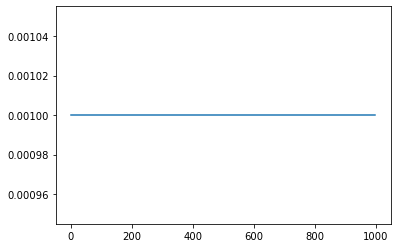

In [23]:
print("----------------Fibu suma------------------")
listaFibuSum = np.array( pruebaFibunacciSuma )

unique_elements_fibu_sum, counts_elements_fibu_sum = np.unique(listaFibuSum, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements_fibu_sum, counts_elements_fibu_sum)))

## normalizado = unique_elements / m
probsFibuSum = counts_elements_fibu_sum / length;
print("Probabilidades: ", probsFibuSum)

plt.plot(probsFibuSum)
"""
Conclusiones:
*En comparacion con los otros generadores este fue el mejor, lo podemos evidenciar en que pasa la mayoria de pruebas de uniformidad y diversidad, ademas lo podemos ver por medio 
de la grafica, nos muestra uniformidad
*El generador de fibonacci aditivo es útil para generar series pseudoaleatoriasbuenas, y con los parámetros adecuados su periodo es largo.

"""

----------------Fibu multiplicacion------------------
Frequency of unique values of the said array:
[[          2       75027      121395 ... 17153401254 17160203174
  17176829862]
 [          1           1           1 ...           1           1
            1]]
Probabilidades:  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.

'\nConclusiones:\n*Este tambien fue uno de los mejores generadores, paso la mayoria de pruebas de uniformidad y diversidad\nEl generador de fibonacci multiplicativo es bueno para generar series de números\npseudoaleatorios. Con los parámetros adecuados es muy bueno a la hora de no \ncaer en patrones predecibles, pero corre el riesgo de converger a cero, por lo que \nse adicionó un parámetro adicional al cálculo que permite evitar dicha convergencia.\n\n'

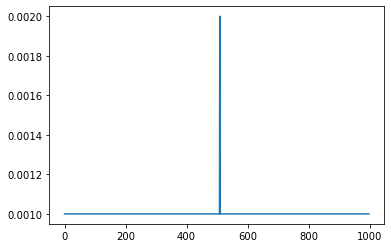

In [24]:
print("----------------Fibu multiplicacion------------------")
listaFibuMul = np.array( pruebaFibunacciMulti )

unique_elements_fibu_mul, counts_elements_fibu_mul = np.unique(listaFibuMul, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements_fibu_mul, counts_elements_fibu_mul)))

## normalizado = unique_elements / m
probsFibuMul = counts_elements_fibu_mul / length;
print("Probabilidades: ", probsFibuMul)

plt.plot(probsFibuMul)
"""
Conclusiones:
*Este tambien fue uno de los mejores generadores, paso la mayoria de pruebas de uniformidad y diversidad
El generador de fibonacci multiplicativo es bueno para generar series de números
pseudoaleatorios. Con los parámetros adecuados es muy bueno a la hora de no 
caer en patrones predecibles, pero corre el riesgo de converger a cero, por lo que 
se adicionó un parámetro adicional al cálculo que permite evitar dicha convergencia.

"""

# PDF practica1

Probabilidades:  [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02]
Chi con confianza de 0.01
True


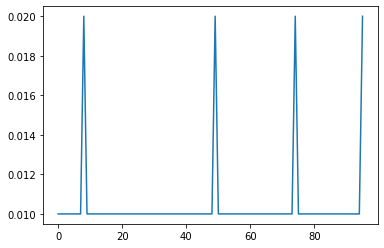

In [25]:
#Aplique la prueba de Chi-Cuadrado con una confianza de 0.01 a los siguientes datos:

datosPractica1 = [0.424 ,0.879, 0.927 ,0.993, 0.340 ,0.633 ,0.363, 0.700 ,0.828 ,0.787 ,0.117 ,0.147 ,0.093, 0.502,
0.247, 0.993 ,0.465 ,0.595 ,0.509, 0.344 ,0.565 ,0.294 ,0.933 ,0.950 ,0.944 ,0.936, 0.448 ,0.821
,0.461 ,0.599 ,0.585 ,0.693 ,0.731 ,0.935 ,0.578 ,0.232 ,0.462 ,0.001, 0.309 ,0.319 ,0.577 ,0.531
,0.642 ,0.534 ,0.707 ,0.120 ,0.740 ,0.648 ,0.238 ,0.002 ,0.010 ,0.688 ,0.286 ,0.512 ,0.655 ,0.452
,0.025 ,0.699 ,0.555 ,0.072 ,0.981 ,0.113 ,0.500 ,0.811 ,0.843 ,0.924, 0.144 ,0.057 ,0.008 ,0.250
,0.053 ,0.531 ,0.596 ,0.299 ,0.726 ,0.569 ,0.677 ,0.726 ,0.785 ,0.844 ,0.164 ,0.714 ,0.044 ,0.077
,0.602 ,0.262 ,0.053 ,0.023 ,0.482 ,0.418 ,0.505 ,0.052 ,0.850 ,0.680 ,0.550 ,0.287 ,0.378 ,0.177
,0.820 ,0.528 ]

listaP1 = np.array( datosPractica1 )

unique_elements_P1, counts_elements_P1 = np.unique(listaP1 , return_counts=True)

## normalizado = unique_elements / m
probsP1 = counts_elements_P1 / len(datosPractica1);
print("Probabilidades: ", probsP1 )

plt.plot(probsP1 )

#De esta secuencia de numeros podemos decir que es una secuencia uniforme, ya que pasa la prueba con una confianza de 0.01 es decir 99%. Tambien lo podemos apreciar en el grafico

print("Chi con confianza de 0.01")
print(chi2(datosPractica1,0.01))

# PDF practica2

Probabilidades:  [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02]
-----corrida con confianza de 0.05-------
True
-----corrida con confianza de 0.1-------
True


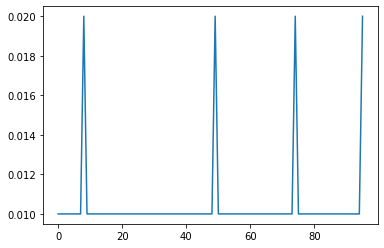

In [26]:
#Aplicar corridas

datosPractica2 = [0.424,0.879,0.927,0.993,0.340,0.633,0.363,0.700,0.828,0.787,0.117,0.147,0.093,0.502
,0.247,0.993,0.465,0.595,0.509,0.344,0.565,0.294,0.933,0.950,0.944,0.936,0.448,0.821
,0.461,0.599,0.585,0.693,0.731,0.935,0.578,0.232,0.462,0.001,0.309,0.319,0.577,0.531
,0.642,0.534,0.707,0.120,0.740,0.648,0.238,0.002,0.010,0.688,0.286,0.512,0.655,0.452
,0.025,0.699,0.555,0.072,0.981,0.113,0.500,0.811,0.843,0.924,0.144,0.057,0.008,0.250
,0.053,0.531,0.596,0.299,0.726,0.569,0.677,0.726,0.785,0.844,0.164,0.714,0.044,0.077
,0.602,0.262,0.053,0.023,0.482,0.418,0.505,0.052,0.850,0.680,0.550,0.287,0.378,0.177
,0.820,0.528]

listaP2 = np.array( datosPractica2 )

unique_elements_P2, counts_elements_P2 = np.unique(listaP2 , return_counts=True)

## normalizado = unique_elements / m
probsP2 = counts_elements_P2 / len(datosPractica1);
print("Probabilidades: ", probsP2 )

plt.plot(probsP2 )

#De esta secuencia de numeros podemos decir que no hay patrones o secuencias entre los numeros, paso la prueba para valor de confianza de 0.05 y 0.1

#confianza 0.05
print("-----corrida con confianza de 0.05-------")
print(corrida(datosPractica2,0.05))

#confianza 0.1
print("-----corrida con confianza de 0.1-------")
print(corrida(datosPractica2,0.1))